## Data visualization in Seaborn

To demonstrate visualization tools, we will use the [tips dataset](https://nagornyy.me/datasets/tips.csv).

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
type(tips)

pandas.core.frame.DataFrame

## Distribution visualization

[Seaborn](https://seaborn.pydata.org/) is a higher level API based on the matplotlib library. Seaborn contains more adequate default charting settings. If you just add import seaborn to the code, the pictures will be much nicer. Also in the library there are quite complex visualization types that would require a lot of code in matplotlib.

The following types of graphs are used to visualize the distribution of metric variables:

- distplot
- jointplot
- rugplot
- kdeplot

You can also visualize the relative distributions between pairs of variables using the methods:

- PairGrid
- pairplot
- FacetGrid

### distplot

distplot displays a histogram and a distribution density plot at the same time.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


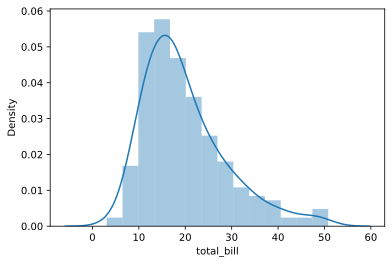

In [ ]:
sns.distplot(tips['total_bill']);

You can leave only the histogram:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


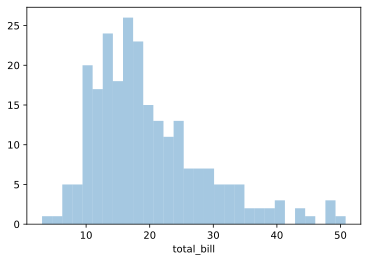

In [ ]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

### jointplot

Jointplot shows the joint distribution over two variables. It has a kind parameter that can take the following values:

- "Scatter"
- "Reg"
- “Resid”
- "Kde"
- "Hex"

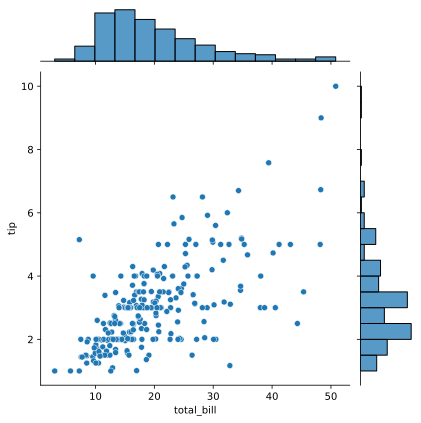

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

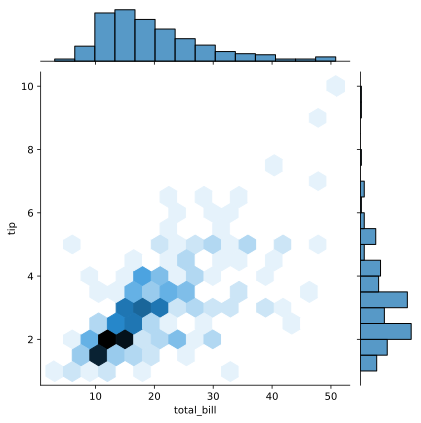

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex');

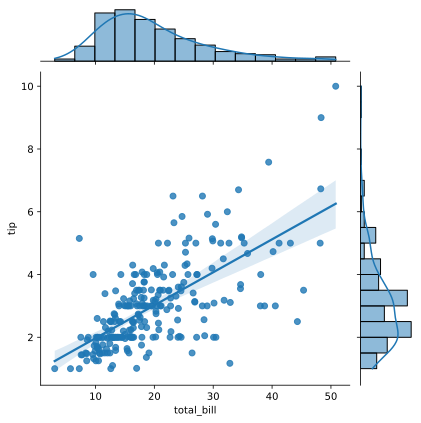

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

### pairplot

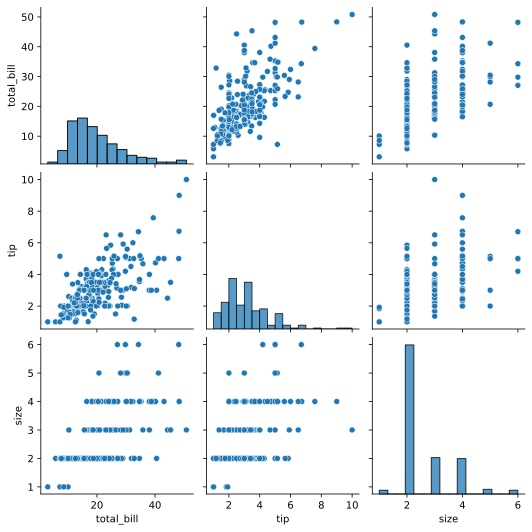

In [ ]:
sns.pairplot(tips);

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


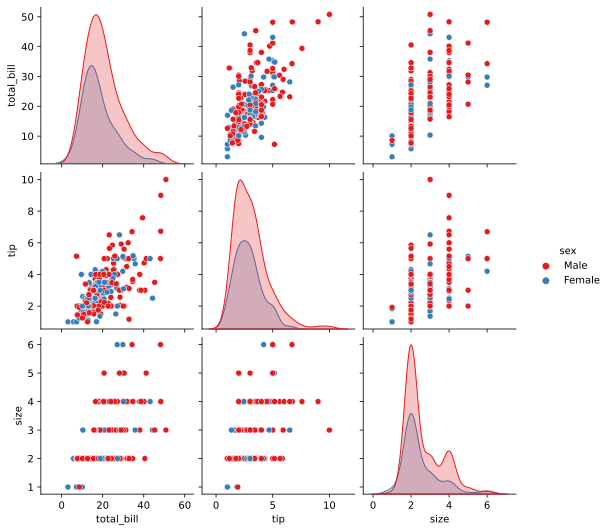

In [ ]:
sns.pairplot(tips, hue='sex', palette='Set1');


In essence, pairplot is a simplified version of another function called PairGrid.

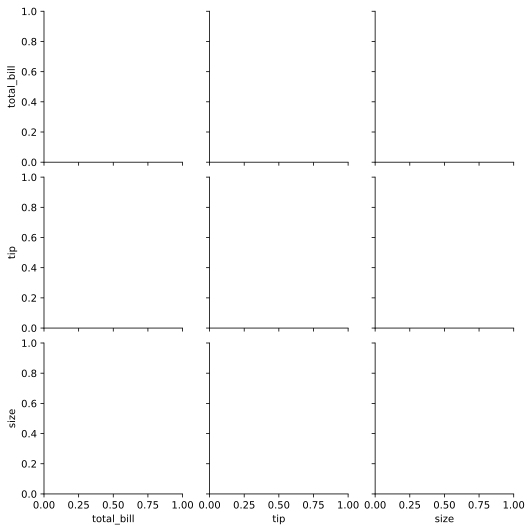

In [ ]:
sns.PairGrid(tips);


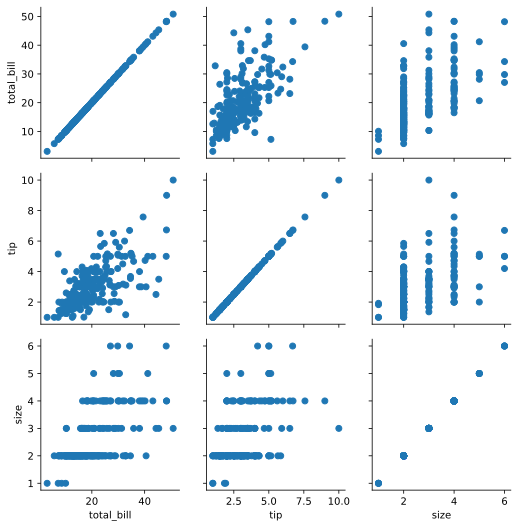

In [ ]:
g = sns.PairGrid(tips)
g.map(plt.scatter);


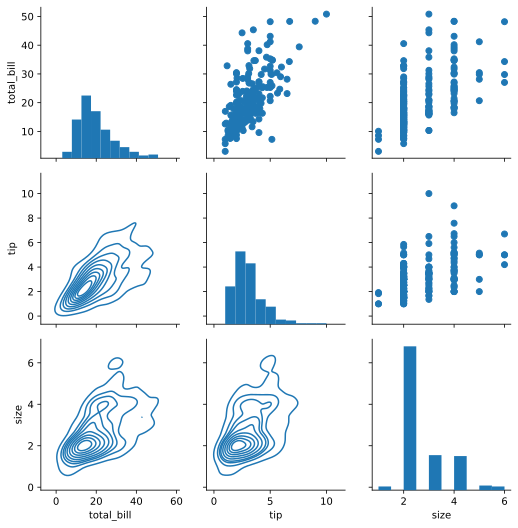

In [ ]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

The density of the distribution in two variables gives us the gradient. Gradient is a vector indicating by its direction the direction of the greatest increase of some quantity $\varphi$, the value of which changes from one point in space to another (scalar field), and in magnitude (modulus) is equal to the growth rate of this quantity in this direction.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


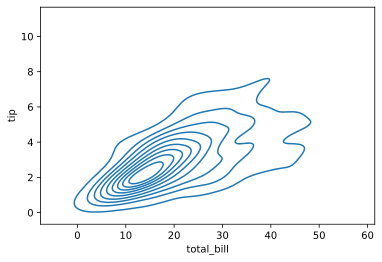

In [ ]:
sns.kdeplot(tips['total_bill'], tips['tip']);

### Facet Grid

Facet Grid allows you to visualize the joint distribution of individual features of several variables.

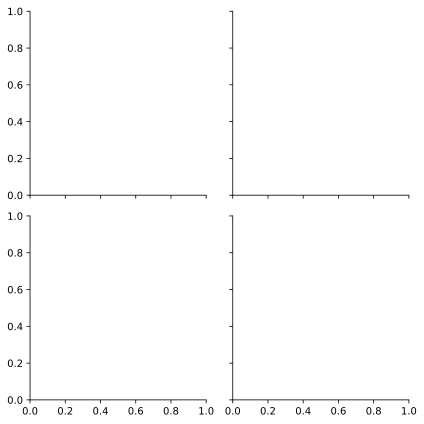

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker");

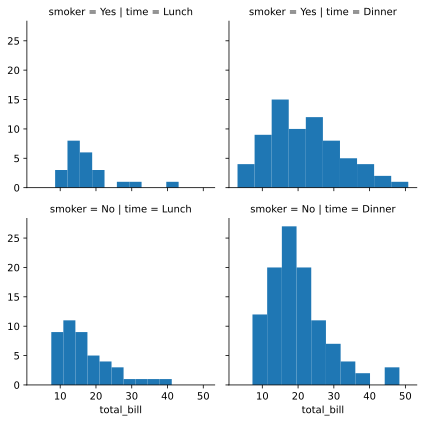

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill");

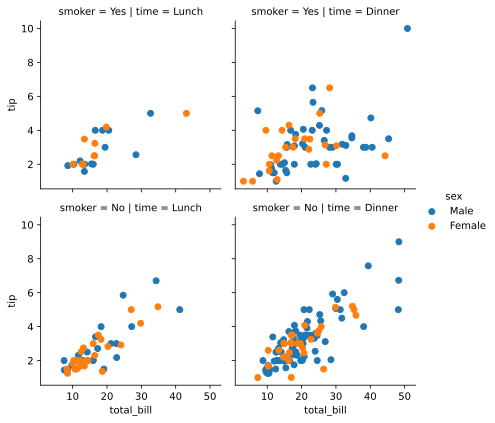

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend();

### rugplot

rugplot shows the same as the distribution density plot, only in one-dimensional form. The denser the lines are, the higher the density. Better to use it in conjunction with other types of charts.

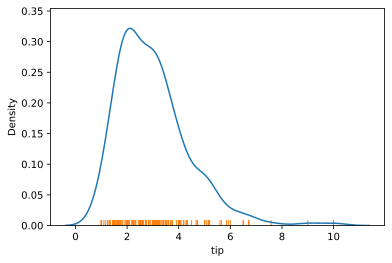

In [ ]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip']);

## Visualizing categorical data

Seaborn has built-in functions for visualizing categorical data in the following formats:

- factorplot
- boxplot
- violinplot
- stripplot
- swarmplot
- barplot
- countplot

Let's take the tip data that comes with seaborn as a test dataset.



### barplot

The first type of visualization is barplot. We have a categorical variable and its numerical value. Barplot aggregates data by the values of a categorical variable and applies a specific function to the values of the corresponding groups of the digital variable. By default, this function is average.

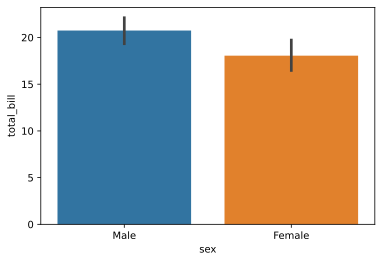

In [ ]:
sns.barplot(x='sex', y='total_bill', data=tips);

This function can be changed in the estimator argument:

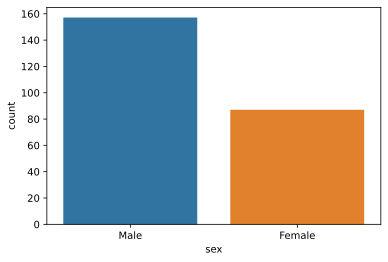

In [ ]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=len)
sns.countplot(x='sex', data=tips);

Here we count the standard deviation.

### countplot

The same as barplot, only the function is already explicitly set, and it counts the number of values in each category.

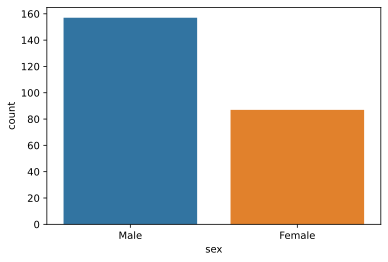

In [ ]:
sns.countplot(x='sex', data=tips);

Intermediate task 1. Plot with barplot in the same way as with countplot.

In [ ]:
# your code here

### boxplot and violinplot

These two graphs are used to study the shape of the distribution.

### boxplot

Another name for boxplot is a box with a mustache or a swing chart. It was developed by John Tukey in the 1970s.

This type of chart shows in a convenient form the median (or, if necessary, the mean), the lower and upper quartiles, the minimum and maximum values ​​of the sample, and outliers. Several of these boxes can be drawn side-by-side to visually compare one distribution with another; they can be positioned both horizontally and vertically. Distances between different parts of the box allow you to determine the degree of scatter (variance) and skewness of the data and to identify outliers.

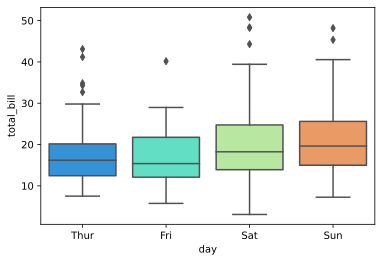

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow');

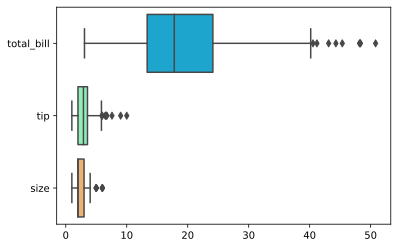

In [ ]:
sns.boxplot(data=tips, palette='rainbow', orient='h');

You can enter a third dimension into the graph:

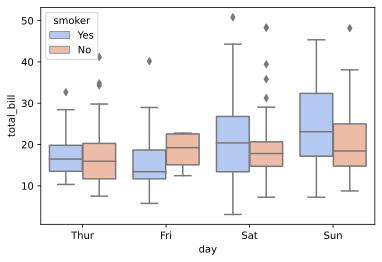

In [ ]:
sns.boxplot(
    x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm");

### violinplot
Performs the same function as boxplot. In fact, these are two graphs of the distribution density rotated by 90 and -90 degrees, stuck together.

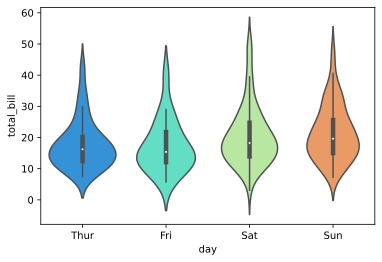

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow');

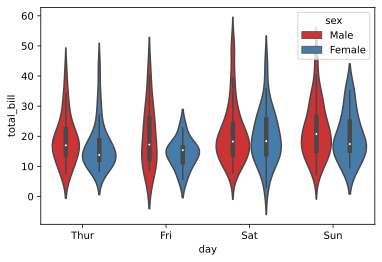

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1');

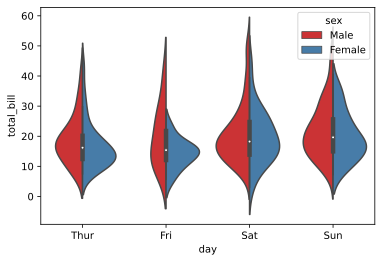

In [ ]:
sns.violinplot(
    x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1');

### stripplot and swarmplot
stripplot plots a scatter plot of one categorical variable. It can be used as an independent figure, but it is better to combine it with other charts.

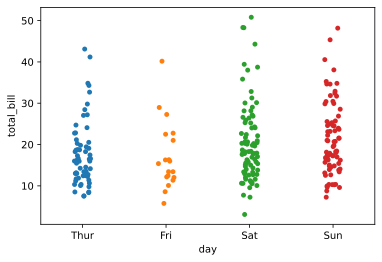

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips);

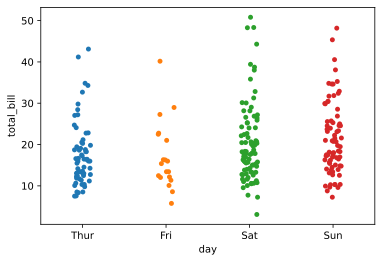

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

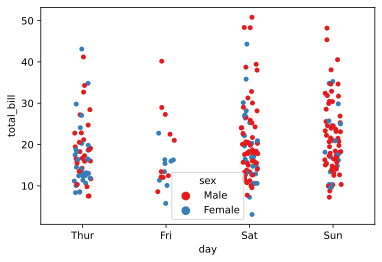

In [ ]:
sns.stripplot(
    x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1');


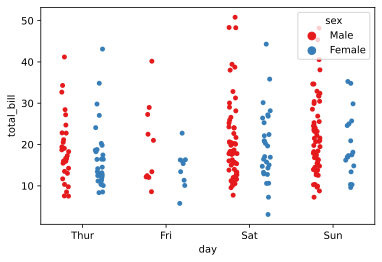

In [ ]:
sns.stripplot(
    x="day",
    y="total_bill",
    data=tips,
    jitter=True,
    hue='sex',
    palette='Set1',
    dodge=True);

Swarmplot is exactly the same, with the only difference that the points do not overlap.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


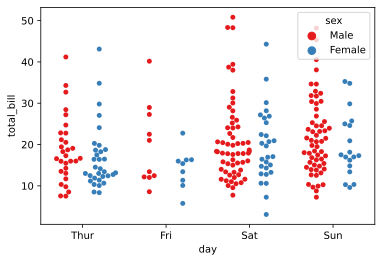

In [ ]:
sns.swarmplot(
    x="day", y="total_bill", hue='sex', data=tips, palette="Set1", dodge=True);

As mentioned earlier, these types of graphs can be combined with others. This is best done with violinplot.

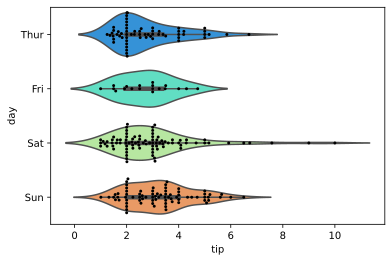

In [ ]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3);

### catplot (formerly factorplot)

From the documentation: The default plot that is shown is a point plot, but other seaborn categorical plots can be chosen with the kind parameter, including box plots, violin plots, bar plots, or strip plots.

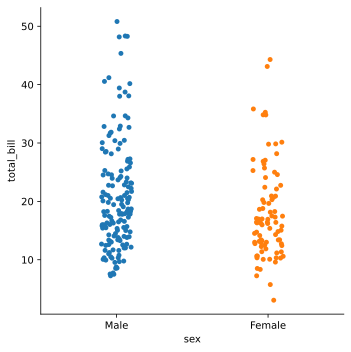

In [ ]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='strip');

## Matrix plots

## Heat map

In [ ]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


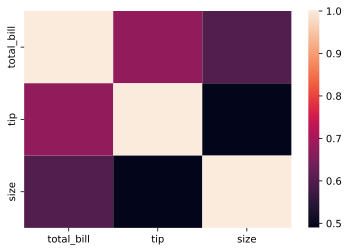

In [ ]:
sns.heatmap(tips.corr())

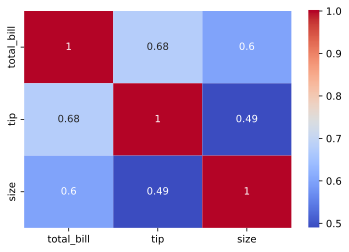

In [ ]:
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True)

Download flights dataset!

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


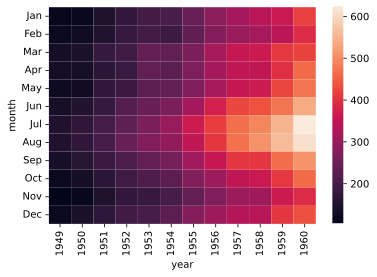

In [ ]:
pvtflights = flights.pivot_table(values='passengers', index='month', columns='year')
sns.heatmap(pvtflights)

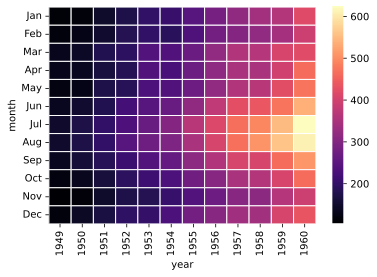

In [ ]:
sns.heatmap(pvtflights, cmap='magma', linecolor='white', linewidths=1)

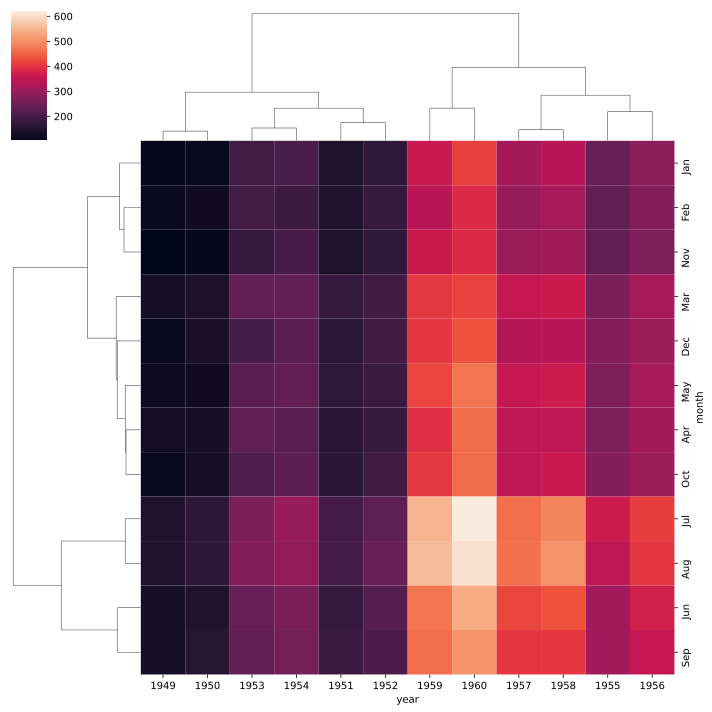

In [ ]:
sns.clustermap(pvtflights)

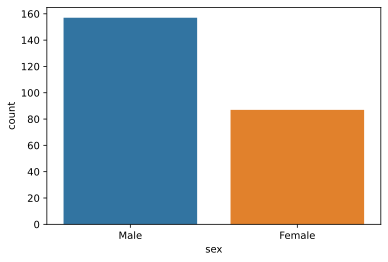

In [ ]:
sns.countplot(x='sex', data=tips)

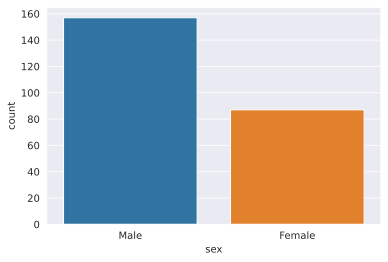

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='sex', data=tips)

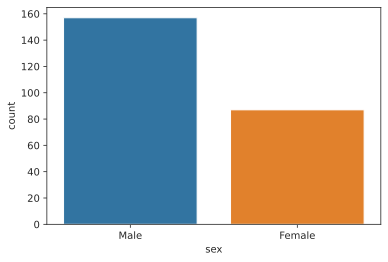

In [ ]:
sns.set_style('ticks', {'xticks.major.size': 50, 'yticks.major.size': 18 })
sns.countplot(x='sex', data=tips)

In [ ]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': True,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

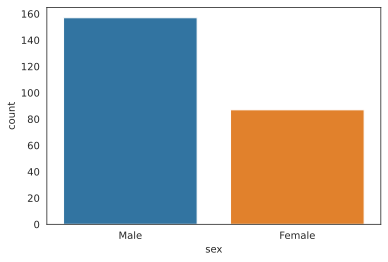

In [ ]:
with sns.axes_style('white'):
    sns.countplot(x='sex', data=tips)

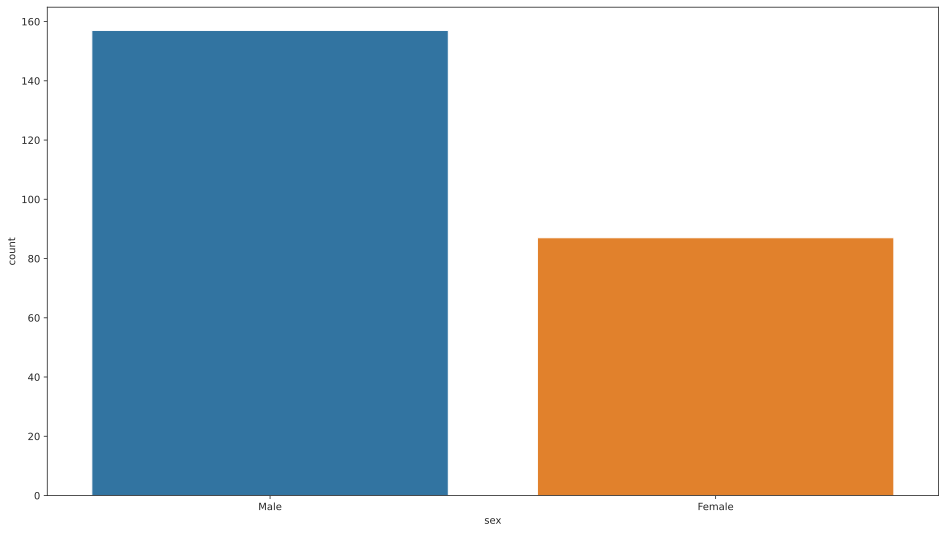

In [ ]:
plt.figure(figsize=(16, 9))
sns.countplot(x='sex', data=tips)

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


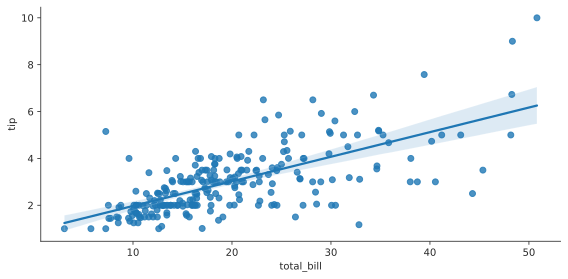

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips, size=4, aspect=2)

mpl and sns 

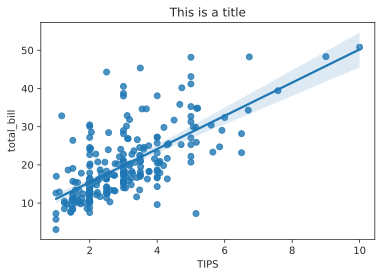

In [ ]:
fir, ax = plt.subplots()
sns.regplot(y='total_bill', x='tip', data=tips, ax=ax)
ax.set_title('This is a title')
plt.xlabel('TIPS')
plt.savefig('sample_fileneme.jpg', dpi=600)